In [ ]:
import os

os.listdir('.')

# os.chdir('C:/Users/0974/Documents/Google Colab/Datasets')

['california_housing_train.csv',
 'heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
filename = 'heart.csv'

dataset = pd.read_csv(filename)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print(dataset['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


Exploratory Data Analysis (EDA)

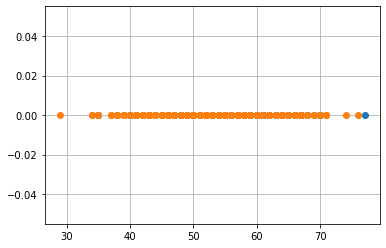

In [ ]:
zero = dataset.loc[dataset["target"] == 0]
one = dataset.loc[dataset["target"] == 1]
plt.plot(zero["age"], np.zeros_like(zero["age"]), 'o')
plt.plot(one["age"], np.zeros_like(one["age"]), 'o')

plt.grid()
plt.show()

In [ ]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="target", size=3);
# plt.show()

In [ ]:
# Mengecek apa ada data yang kosong
for i in dataset.columns:
    print(i, ': ', len(dataset[dataset[i].isnull()][i]))

age :  0
sex :  0
cp :  0
trestbps :  0
chol :  0
fbs :  0
restecg :  0
thalach :  0
exang :  0
oldpeak :  0
slope :  0
ca :  0
thal :  0
target :  0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature = dataset.drop(['target'], axis=1)
label = dataset['target']

feature_scaled = scaler.fit_transform(feature.values)

data_feature = pd.DataFrame(feature_scaled, columns=feature.columns)

In [ ]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(data_feature, label, test_size=0.25, random_state=4)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost

In [ ]:
names = ["Random Forest Classifier estimator 20", "Random Forest Classifier estimator 40","Random Forest Classifier estimator 60","Random Forest Classifier estimator 80","SVM RBF","SVM Linear","SVM Polynomial", "Linear SVC", "K-Nearest Neighbors k=1", "K-Nearest Neighbors k=3", "K-Nearest Neighbors k=5", "K-Nearest Neighbors k=7", "K-Nearest Neighbors k=9", "K-Nearest Neighbors k=11", "K-Nearest Neighbors k=13", "K-Nearest Neighbors k=15", "Decision Tree Classifier", "Neural Network Classifier", "Ada Boost Classifier", "Naive Bayes", "QDA"]

classifiers = [RandomForestClassifier(n_estimators=20 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =40 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =60 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =80 , bootstrap=True, max_features="sqrt"),
SVC(kernel='rbf'),
SVC(kernel='linear'),
SVC(kernel='poly'),
LinearSVC(),
KNeighborsClassifier(n_neighbors=1),
KNeighborsClassifier(n_neighbors=3),
KNeighborsClassifier(n_neighbors=5),
KNeighborsClassifier(n_neighbors=7),
KNeighborsClassifier(n_neighbors=9),
KNeighborsClassifier(n_neighbors=11),
KNeighborsClassifier(n_neighbors=13),
KNeighborsClassifier(n_neighbors=15),
DecisionTreeClassifier(max_depth=5),
MLPClassifier(alpha=1, max_iter=1000),
AdaBoostClassifier(n_estimators=50, learning_rate=1),
GaussianNB(),
QuadraticDiscriminantAnalysis()
 ]

In [ ]:
def nClassifier(name, classifier):
    for n in range(len(name)):
        classifier[n].fit(feature_train, label_train)
        label_pred = classifier[n].predict(feature_test)
        print('Accuracy of', name[n], 'on test set: {:.3f}'.format(classifier[n].score(feature_test, label_test)))
        print('F1 Score: {:.3f}'.format(f1_score(label_test, label_pred, average="macro")))
        print('Precision Score: {:.3f}'.format(precision_score(label_test, label_pred, average="macro")))
        print('Recall Score: {:.3f}'.format(recall_score(label_test, label_pred, average="macro")))
        print(" ")
    return

In [ ]:
nClassifier(names, classifiers)

Accuracy of Random Forest Classifier estimator 20 on test set: 0.829
F1 Score: 0.822
Precision Score: 0.835
Recall Score: 0.817
 
Accuracy of Random Forest Classifier estimator 40 on test set: 0.829
F1 Score: 0.822
Precision Score: 0.835
Recall Score: 0.817
 
Accuracy of Random Forest Classifier estimator 60 on test set: 0.789
F1 Score: 0.780
Precision Score: 0.795
Recall Score: 0.775
 
Accuracy of Random Forest Classifier estimator 80 on test set: 0.829
F1 Score: 0.822
Precision Score: 0.835
Recall Score: 0.817
 
Accuracy of SVM RBF on test set: 0.803
F1 Score: 0.798
Precision Score: 0.800
Recall Score: 0.797
 
Accuracy of SVM Linear on test set: 0.803
F1 Score: 0.797
Precision Score: 0.802
Recall Score: 0.794
 
Accuracy of SVM Polynomial on test set: 0.763
F1 Score: 0.749
Precision Score: 0.773
Recall Score: 0.745
 
Accuracy of Linear SVC on test set: 0.842
F1 Score: 0.835
Precision Score: 0.853
Recall Score: 0.829
 
Accuracy of K-Nearest Neighbors k=1 on test set: 0.763
F1 Score: 0.

Dari data diatas, nilai akurasi tertinggi ditemukan pada Neural Network Classifier on test set: 0.842